# Data Cleaning

Now that we have extracted all the data we'll be working with, we clean it up for use in our downstream models. This includes dealing with null values, collapsing certain classes, and performing a few exclusions of some small number of data elements that don't make sense.

In [1]:
## Import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from warnings import simplefilter

simplefilter(action="ignore", category=pd.errors.PerformanceWarning)
from matplotlib import pyplot
from pathlib import Path

## Import the dataset
root_path = Path.cwd().parent.parent.parent / "data"
df = pd.read_parquet(root_path / "merged_data.parquet")

In [2]:
df.shape

(476394, 16)

# Handling NaN Values

Text(0, 0.5, 'Sample Number')

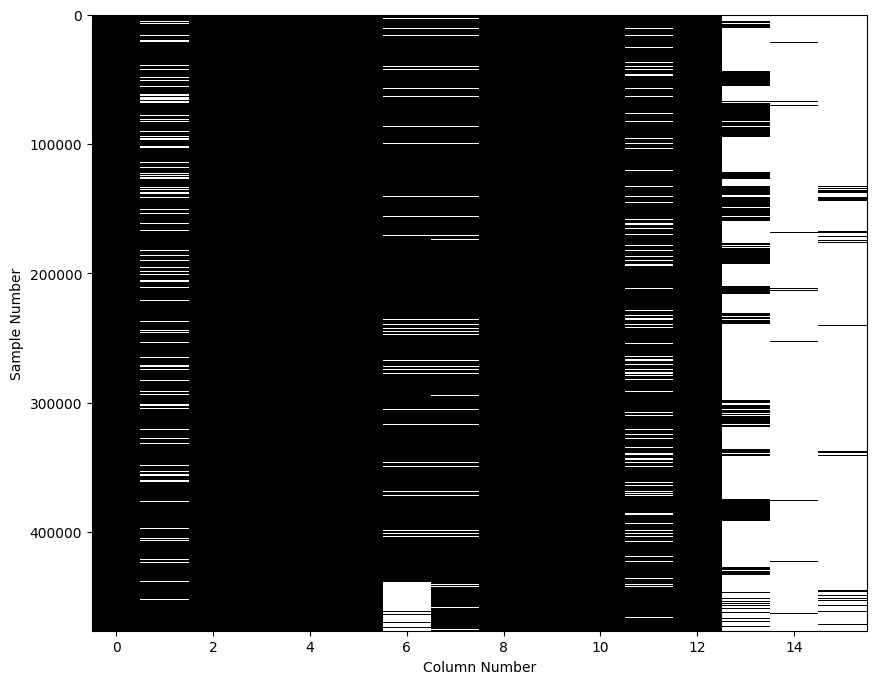

In [3]:
# visualize the number of NA rows
plt.figure(figsize=(10, 8))
plt.imshow(df.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number")

In [4]:
df.isnull().sum()

CHECKUP1         2
TOLDHI3      61607
CVDINFR4         2
CVDSTRK3         2
CHCKDNY2         3
DIABETE4         3
ECIGNOW1     57862
ALCDAY5      26010
_PRACE1          5
_SEX             0
_AGE_G           0
_BMI5CAT     49284
_SMOKER3         0
MARIJAN1    332575
CNCRTYP1    465955
LCSFIRST    459475
dtype: int64

In [5]:
# remove na values for just stroke since there are only 2
df.dropna(subset=["CVDSTRK3"], axis=0, inplace=True)

In [6]:
df1 = df.copy()

Text(0.5, 1.0, 'CHECKUP1')

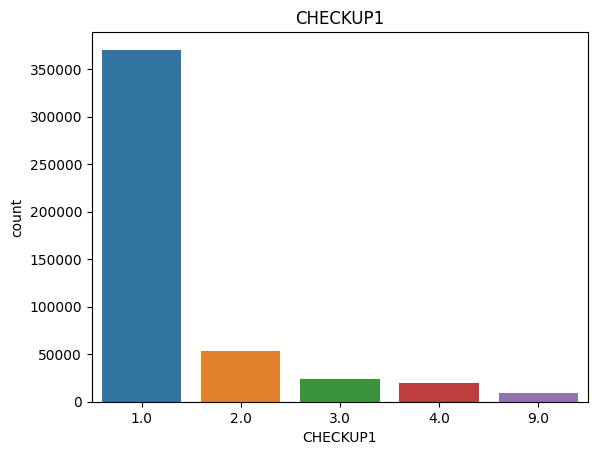

In [7]:
## replace CHECKUP1
df1["CHECKUP1"] = df1["CHECKUP1"].replace([7.0], 9.0)
df1["CHECKUP1"] = df1["CHECKUP1"].replace([8.0], 9.0)
df1["CHECKUP1"].fillna(9.0, inplace=True)
sns.countplot(x="CHECKUP1", data=df1).set_title("CHECKUP1")

Text(0.5, 1.0, 'TOLDHI3')

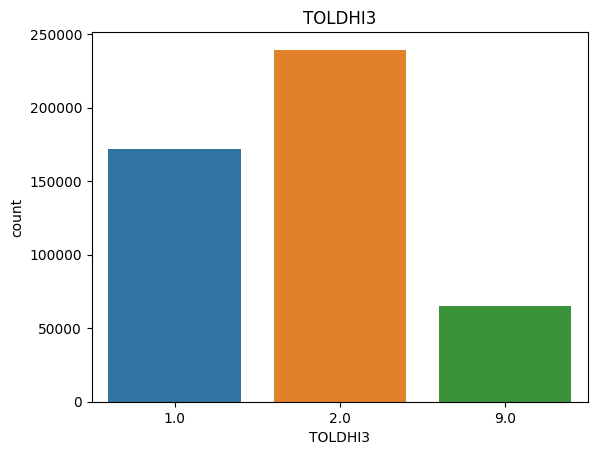

In [8]:
## replace TOLDHI3
df1["TOLDHI3"] = df1["TOLDHI3"].replace([7.0], 9.0)
df1["TOLDHI3"].fillna(9.0, inplace=True)

sns.countplot(x="TOLDHI3", data=df1).set_title("TOLDHI3")

Text(0.5, 1.0, 'CVDINFR4')

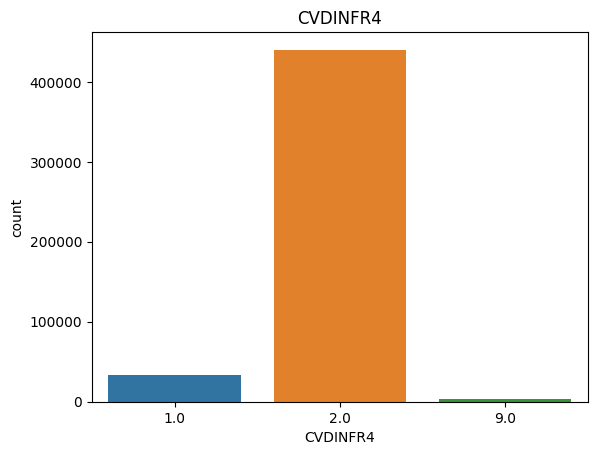

In [9]:
## replace CVDINFR4
df1["CVDINFR4"] = df1["CVDINFR4"].replace([7.0], 9.0)
df1["CVDINFR4"].fillna(9.0, inplace=True)
sns.countplot(x="CVDINFR4", data=df1).set_title("CVDINFR4")

Text(0.5, 1.0, 'CVDSTRK3')

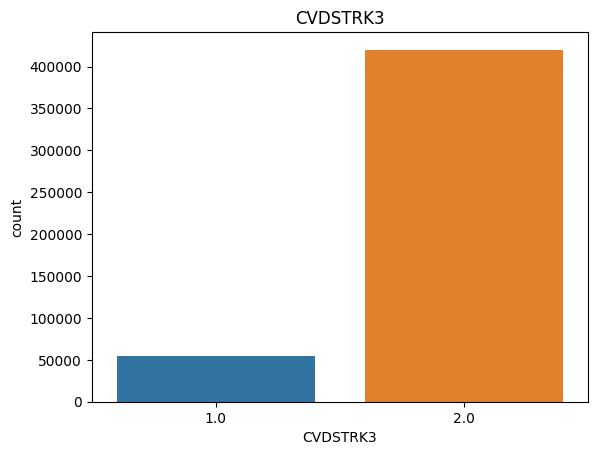

In [10]:
## replace CVDSTRK3
df1 = df1[df1.CVDSTRK3 != 9.0]
df1 = df1[df1.CVDSTRK3 != 7.0]
sns.countplot(x="CVDSTRK3", data=df1).set_title("CVDSTRK3")
# 1 is yes 2 is no

Text(0.5, 1.0, 'CHCKDNY2')

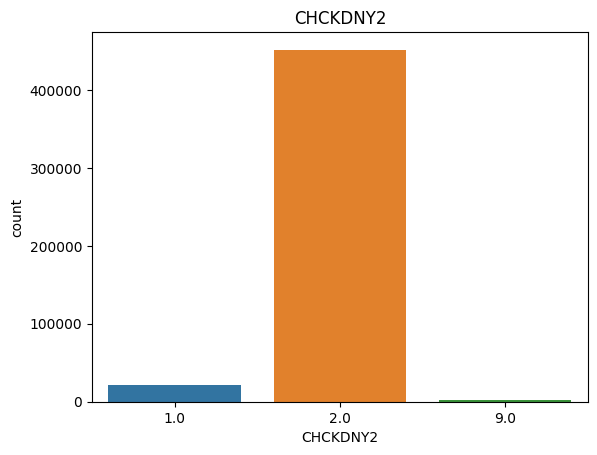

In [11]:
## replace CHCKDNY2
df1["CHCKDNY2"] = df1["CHCKDNY2"].replace([7.0], 9.0)
df1["CHCKDNY2"].fillna(9.0, inplace=True)
sns.countplot(x="CHCKDNY2", data=df1).set_title("CHCKDNY2")

Text(0.5, 1.0, 'DIABETE4')

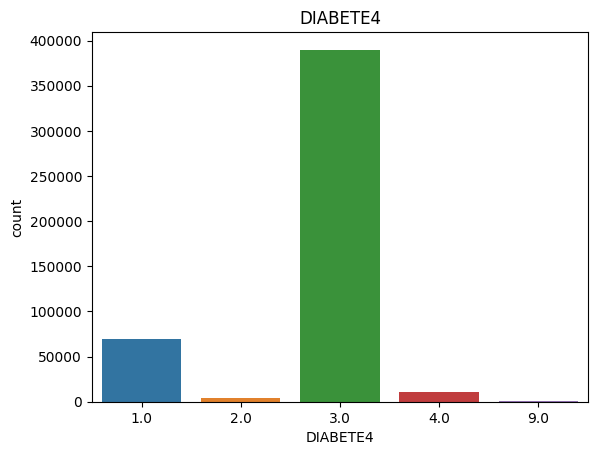

In [12]:
## replace DIABETE4
df1["DIABETE4"] = df1["DIABETE4"].replace([7.0], 9.0)
df1["DIABETE4"].fillna(9.0, inplace=True)
sns.countplot(x="DIABETE4", data=df1).set_title("DIABETE4")

Text(0.5, 1.0, 'ECIGNOW1')

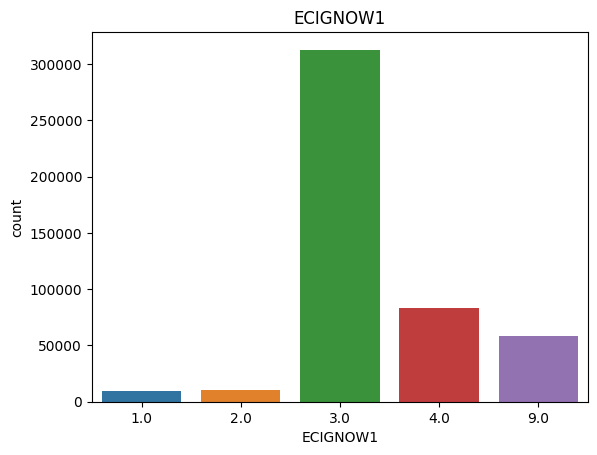

In [13]:
## then replace ECIGNOW1
df1["ECIGNOW1"] = df1["ECIGNOW1"].replace([7.0], 9.0)
df1["ECIGNOW1"].fillna(9.0, inplace=True)

sns.countplot(x="ECIGNOW1", data=df1).set_title("ECIGNOW1")

Text(0.5, 1.0, 'ALCDAY5')

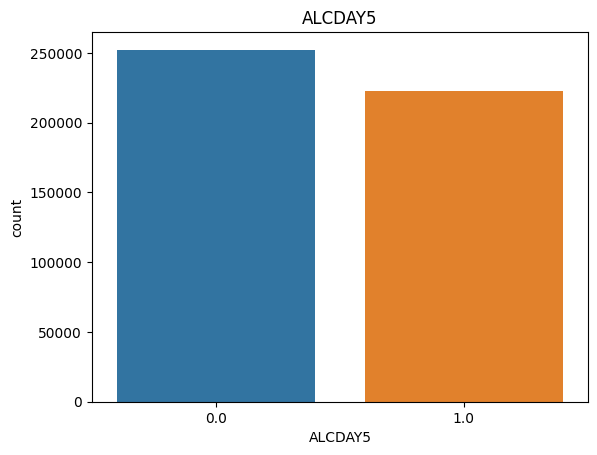

In [14]:
## then replace ALCDAY5
df1["ALCDAY5"] = df1["ALCDAY5"].replace([999.0], 0.0)
df1["ALCDAY5"] = df1["ALCDAY5"].replace([777.0], 0.0)
df1["ALCDAY5"] = df1["ALCDAY5"].replace([888.0], 0.0)
df1["ALCDAY5"].fillna(0.0, inplace=True)
df1["ALCDAY5"] = df1["ALCDAY5"].mask(df1["ALCDAY5"] != 0.0, 1.0)

sns.countplot(x="ALCDAY5", data=df1).set_title("ALCDAY5")

Text(0.5, 1.0, '_PRACE1')

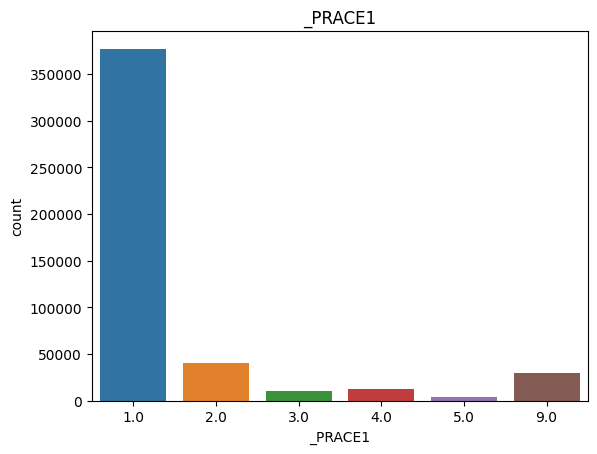

In [15]:
## then replace _PRACE1
df1["_PRACE1"] = df1["_PRACE1"].replace([6.0], 9.0)
df1["_PRACE1"] = df1["_PRACE1"].replace([7.0], 9.0)
df1["_PRACE1"] = df1["_PRACE1"].replace([8.0], 9.0)
df1["_PRACE1"] = df1["_PRACE1"].replace([77.0], 9.0)
df1["_PRACE1"] = df1["_PRACE1"].replace([99.0], 9.0)
df1["_PRACE1"].fillna(9.0, inplace=True)

sns.countplot(x="_PRACE1", data=df1).set_title("_PRACE1")

Text(0.5, 1.0, '_SEX')

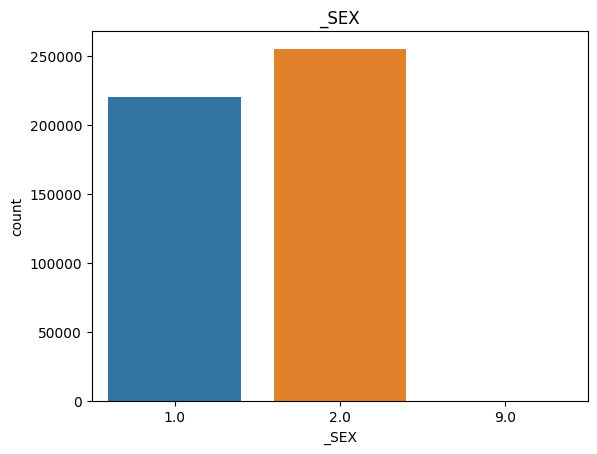

In [16]:
## NOTHING CHANGED _SEX
sns.countplot(x="_SEX", data=df1).set_title("_SEX")

Text(0.5, 1.0, '_AGE_G')

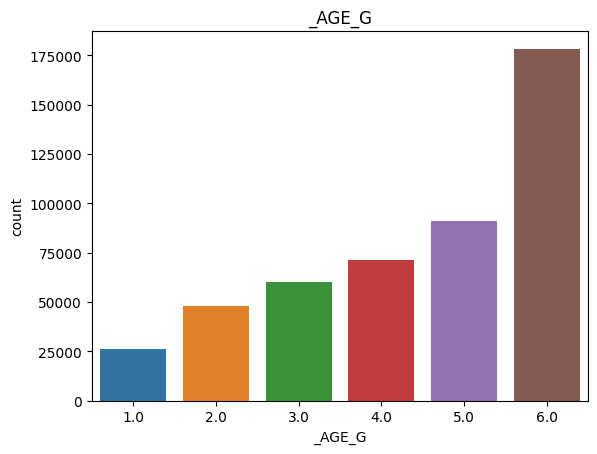

In [17]:
## NOTHING CHANGED _AGE_G
sns.countplot(x="_AGE_G", data=df1).set_title("_AGE_G")

Text(0.5, 1.0, '_BMI5CAT')

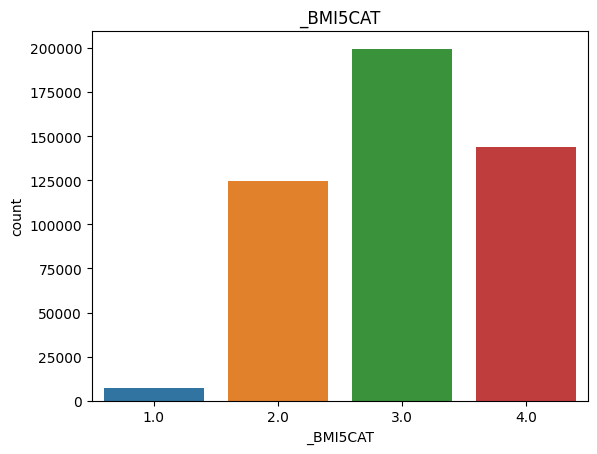

In [18]:
## then replace _BMI5CAT
df1["_BMI5CAT"].fillna(3.0, inplace=True)

sns.countplot(x="_BMI5CAT", data=df1).set_title("_BMI5CAT")

Text(0.5, 1.0, '_SMOKER3')

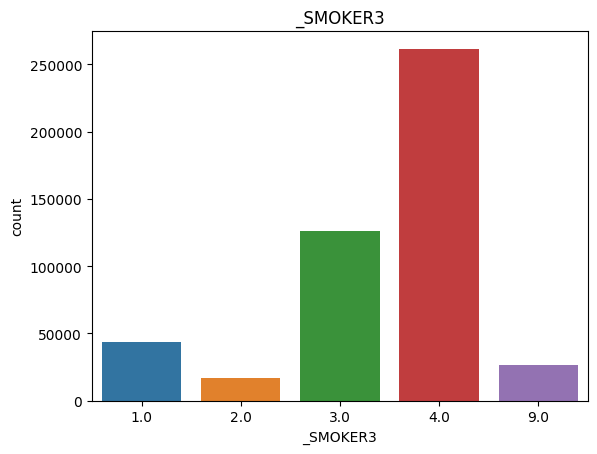

In [19]:
## NOTHING CHANGED _SMOKER3
sns.countplot(x="_SMOKER3", data=df1).set_title("_SMOKER3")

Text(0.5, 1.0, 'LCSFIRST')

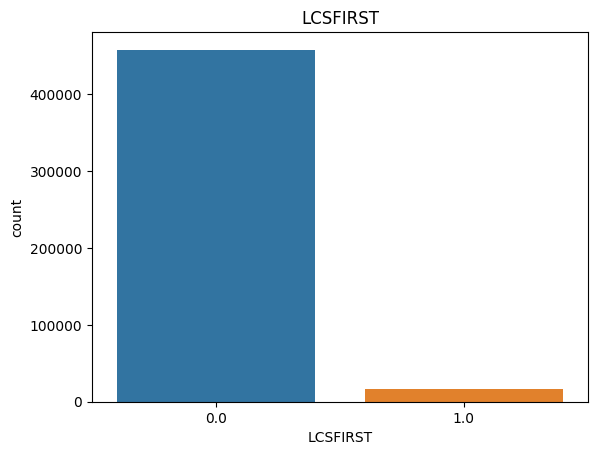

In [20]:
## then replace LCSFIRST 1 -> smokes cigarettes 0 -> does not smoke cigarettes
df1["LCSFIRST"].fillna(0.0, inplace=True)
df1["LCSFIRST"] = df1["LCSFIRST"].mask(df1["LCSFIRST"] != 0.0, 1.0)

sns.countplot(x="LCSFIRST", data=df1).set_title("LCSFIRST")

Text(0.5, 1.0, 'MARIJAN1')

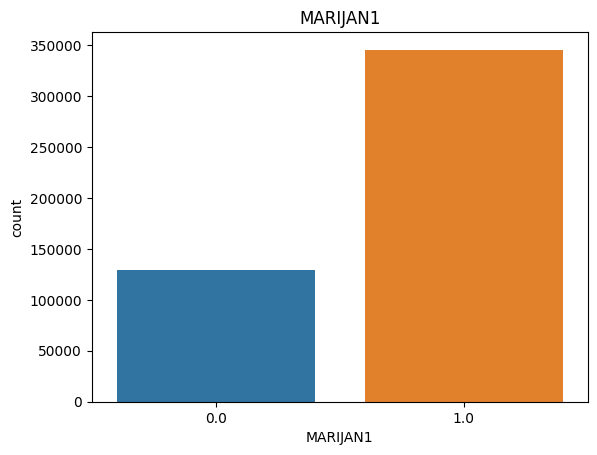

In [21]:
## then replace MARIJAN1
df1["MARIJAN1"] = df1["MARIJAN1"].replace([77.0], 0.0)
df1["MARIJAN1"] = df1["MARIJAN1"].replace([88.0], 0.0)
df1["MARIJAN1"] = df1["MARIJAN1"].replace([99.0], 0.0)
df1["MARIJAN1"].fillna(1.0, inplace=True)
df1["MARIJAN1"] = df1["MARIJAN1"].mask(df1["MARIJAN1"] != 0.0, 1.0)

sns.countplot(x="MARIJAN1", data=df1).set_title("MARIJAN1")

Text(0.5, 1.0, 'CNCRTYP1')

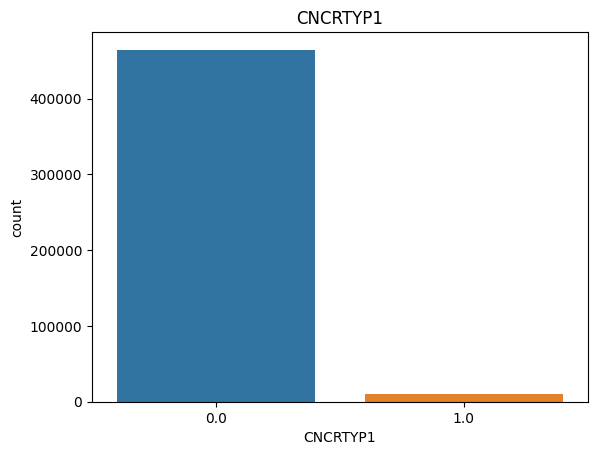

In [22]:
## then replace CNCRTYP1
df1["CNCRTYP1"].fillna(0.0, inplace=True)
df1["CNCRTYP1"] = df1["CNCRTYP1"].mask(df1["CNCRTYP1"] != 0.0, 1.0)

sns.countplot(x="CNCRTYP1", data=df1).set_title("CNCRTYP1")

In [23]:
# make df = df1
df = df1.copy()

In [24]:
df.isnull().sum()

CHECKUP1    0
TOLDHI3     0
CVDINFR4    0
CVDSTRK3    0
CHCKDNY2    0
DIABETE4    0
ECIGNOW1    0
ALCDAY5     0
_PRACE1     0
_SEX        0
_AGE_G      0
_BMI5CAT    0
_SMOKER3    0
MARIJAN1    0
CNCRTYP1    0
LCSFIRST    0
dtype: int64

In [25]:
df.shape

(474965, 16)

In [26]:
sns.set(rc={"figure.figsize": (16.7, 9.27)})

Text(0.5, 1.0, 'Heat Map of Merged Stroke Data')

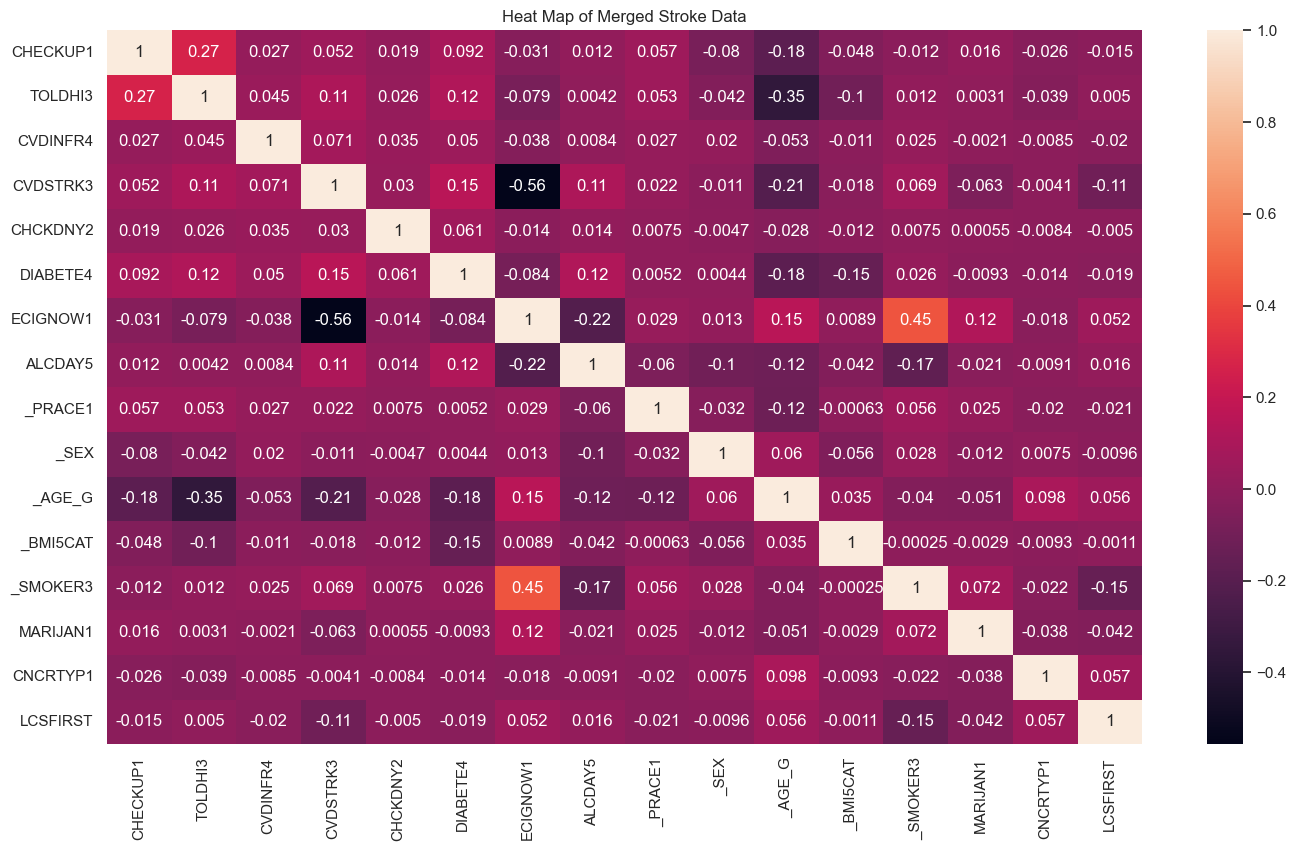

In [27]:
# Heatmap
corr = df.corr()
sns.heatmap(corr, annot=True).set_title("Heat Map of Merged Stroke Data")

In [28]:
# Dump data for downstream use

df.to_parquet(root_path / "final_data.parquet")